In [1]:
#importing library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  persiantools.jdatetime import JalaliDate
import openpyxl as open
import scipy.stats as sp

In [2]:
#Cleaning Data
df = pd.read_csv("D:\\Programming\\DataAnalisys\\EX2\\Tamrin.csv")
# to change index 0 name
df = df.rename(columns={df.columns[0] :"No"})
df.info()
df.ndim



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No           541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


2

In [3]:
df = df.fillna('bfill')
df.info()

df.iloc[0]
print(df.iloc[0:30:1,0:5:1])

Sample = df["UnitPrice"]
print("range : ", Sample.min() ,",", Sample.max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No           541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  541909 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   541909 non-null  object 
 8   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 37.2+ MB
    No InvoiceNo StockCode                          Description  Quantity
0    0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6
1    1    536365     71053                  WHITE METAL LANTERN         6
2    2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8
3    3    536365    84029G  KNITTED UNION FLAG HOT WATER B

In [4]:
#Using def

def Level(price : int) -> str:
    if price < 0:
        return "Is Not VALID"
    if price > 0 and price < 20000:
        return "It is normal"
    if price > 20000:
        return "It's Too expensive"
    
df["Level"] = df["UnitPrice"].apply(Level)
df.info()
print(df.iloc[::,9])




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No           541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  541909 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   541909 non-null  object 
 8   Country      541909 non-null  object 
 9   Level        539394 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 41.3+ MB
0         It is normal
1         It is normal
2         It is normal
3         It is normal
4         It is normal
              ...     
541904    It is normal
541905    It is normal
541906    It is normal
541907    It is normal
541908    It is normal
Name: Level, Length: 541909, dtype: object


In [5]:
#Statistics and where

MeanPrice = df["UnitPrice"].where(df["UnitPrice"] > 0,0).mean()
print(MeanPrice)

X = np.array(df["UnitPrice"])
modeprice = sp.mode(X)
print(modeprice)

median = np.median(X)
print(median)

4.651939890276781
ModeResult(mode=1.25, count=50496)
2.08


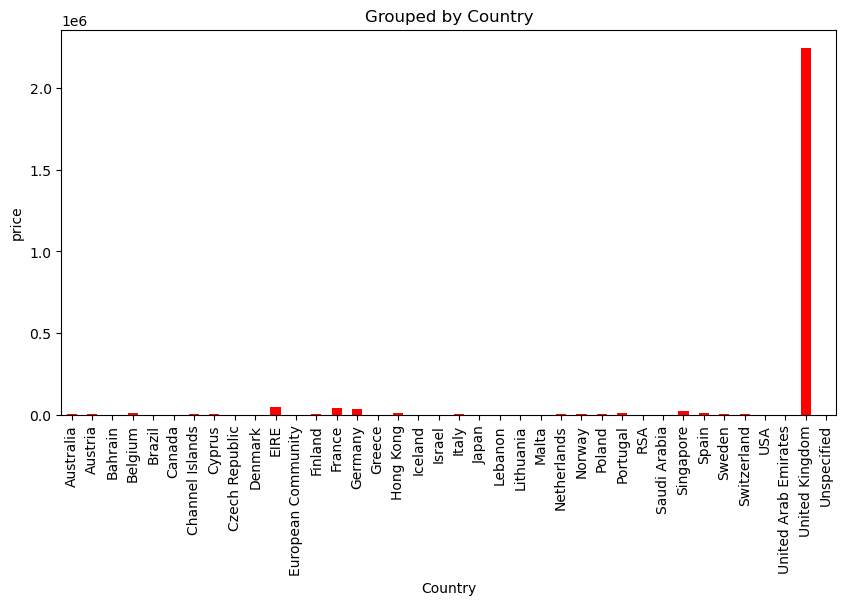

In [6]:
#Plot

grouped = df.groupby("Country")["UnitPrice"].sum()
grouped.plot(kind="bar",figsize=(10,5), title="Grouped by Country", color='red')
plt.ylabel("price")
plt.xlabel("Country")
plt.show()

In [16]:
#JalaliDate
def ConverDate(date):
    return JalaliDate(date)

df["pdate"] = df["InvoiceDate"].apply(ConverDate)
df.info()
print(df["pdate"].head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No           541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  541909 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   541909 non-null  object 
 8   Country      541909 non-null  object 
 9   Level        539394 non-null  object 
 10  pdate        541909 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 45.5+ MB
<bound method NDFrame.head of 0         1389-09-10
1         1389-09-10
2         1389-09-10
3         1389-09-10
4         1389-09-10
             ...    
541904    1390-09-18
541905    1390-09-18
541906    1390-09-18
541907    1390-09-18
541908    1390-09-18
Name: 